# Numerical Integration

TMA4125 Vår 2022

This notebook accompanies the slides [03-Numerical-Integration.pdf](https://www.math.ntnu.no/emner/TMA4125/2022v/lecture-notes/03-Numerical-Integration.pdf).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from math import factorial

In [2]:
def QuadratureRule(f, xq, wq):
    """
        QuadratureRule(f, xq, wq)
    
    Computes an approximation of the integral f for a given _q_uadrature _r_ule.
    Input:
        f:  integrand
        xq: quadrature nodes
        wq: quadrature weights
    """
    n = len(xq)
    if (n != len(wq)): # we need the same number of nodes and weights
        raise RuntimeError("Error: Need same number of quadrature nodes and␣ 􏰀→weights!")
    return np.array(wq)@f(np.array(xq))

We want to check how good our quadrature rules are when we compute the integral

$$ \int_0^1 \cos\bigl(\frac{\pi}{2}x\bigr)\,\mathrm{d}x = \frac{2}{\pi} = 0.636619... $$

Using the general function `QuadratureRule` given above

In [25]:
def f(x):
    return np.cos(pi/2 * x)

exact_integral_f = 2/pi

# Example: Take Trapezoidal rule
xq = [0, 1]
wq = [1/2, 1/2]
qr_f = QuadratureRule(f, xq, wq)
print("I[f] = {}".format(exact_integral_f))
print("Q[f] = {}".format(qr_f))
print("I[f] - Q[f] = {:.10e}".format(exact_integral_f - qr_f))

I[f] = 0.6366197723675814
Q[f] = 0.5
I[f] - Q[f] = 1.3661977237e-01


In [26]:
# Example 2: check Midpoint rule
xq = [1/2]
wq = [1]
qr_f = QuadratureRule(f, xq, wq)
print("I[f] = {}".format(exact_integral_f))
print("Q[f] = {}".format(qr_f))
print("I[f] - Q[f] = {:.10e}".format(exact_integral_f - qr_f))

I[f] = 0.6366197723675814
Q[f] = 0.7071067811865476
I[f] - Q[f] = -7.0487008819e-02


In [27]:
# Example 2: check Gauß-Legendre
xq = [1/2+np.sqrt(3)/6, 1/2-np.sqrt(3)/6]
wq = [1/2, 1/2]
qr_f = QuadratureRule(f, xq, wq)
print("I[f] = {}".format(exact_integral_f))
print("Q[f] = {}".format(qr_f))
print("I[f] - Q[f] = {:.10e}".format(exact_integral_f - qr_f))

I[f] = 0.6366197723675814
Q[f] = 0.6356474078605917
I[f] - Q[f] = 9.7236450699e-04


In [29]:
# Example 3: Simpson's rule
xq = [0, 1/2, 1]
wq = [1/6, 2/3, 1/6]
qr_f = QuadratureRule(f, xq, wq)
print("I[f] = {}".format(exact_integral_f))
print("Q[f] = {}".format(qr_f))
print("I[f] - Q[f] = {:.10e}".format(exact_integral_f - qr_f))

I[f] = 0.6366197723675814
Q[f] = 0.6380711874576983
I[f] - Q[f] = -1.4514150901e-03


## Test the degree of exactness

On slide #14 we can numerically check

In [33]:
for n in range(7):
    print("- Testing degree n = {}".format(n))
 
    def f(x):
        return x**n
    # we are on [0,1] and F is 1/(n+1)x^{n+1} and F(1)-F(0) is just
    exact_integral_f = 1/(n+1)
    
    xq = [1/2+np.sqrt(3)/6, 1/2-np.sqrt(3)/6]
    wq = [1/2, 1/2]
    qr_f = QuadratureRule(f, xq, wq)
    print("I[f] - Q[f] = {:.10e}\n".format(exact_integral_f - qr_f))

- Testing degree n = 0
I[f] - Q[f] = 0.0000000000e+00

- Testing degree n = 1
I[f] - Q[f] = 0.0000000000e+00

- Testing degree n = 2
I[f] - Q[f] = -5.5511151231e-17

- Testing degree n = 3
I[f] - Q[f] = 2.7755575616e-17

- Testing degree n = 4
I[f] - Q[f] = 5.5555555556e-03

- Testing degree n = 5
I[f] - Q[f] = 1.3888888889e-02

- Testing degree n = 6
I[f] - Q[f] = 2.2486772487e-02



## Composite Simpson rule

From slide #24 we can directly implement

In [7]:
def CompositeSimpson(f, a, b, m):
    """
        CompositeSimpson(f, a, b, m)
    
    Computes an approximation of the integral f
    using the composite Simpson's rule.
    Input:
        f:  integrand
        a:  left interval endpoint
        b:  right interval endpoint
        m:  number of subintervals
    """
    # Since we need the mid points -> double number of
    # sampling points to include them
    n = 2*m
    xq = np.linspace(a, b, n+1)
    h = (b-a)/n
    S1 = f(xq[0]) + f(xq[n]) # f(a) and f(b) (only appear once)
    S2 = sum(f(xq[1:n:2])) # mid points S2 = f(x_1)+f(x_3)+...+f(x_m)
    S3 = sum(f(xq[2:n-1:2]))# first/third points (excl. a,b) S3 = f(x_2)+f(x_4)+...+f(x_{m-1})
    S = h/3*(S1 + 4*S2 + 2*S3)
    return S  

## Error Estimate

How many points do we need? Continue from Slide #25

In [8]:
def f(x):
    return np.cos(pi/2 * x)

a, b = 0, 1
exact_solution = 2/pi

previous_error = 0

for m in [1,2,4,8,16]:
    Sm = CompositeSimpson(f, a, b, m)
    int_error = exact_solution - Sm
    if previous_error != 0:
       print('m = {:3d}, error = {:.3e}, reduction factor = {:.3e}'.format(m, int_error, int_error/previous_error))
    else:
       print('m = {:3d},  error = {:.3e}'.format(m, int_error))
    previous_error = int_error

m =   1,  error = -1.451e-03
m =   2, error = -8.568e-05, reduction factor = 5.903e-02
m =   4, error = -5.281e-06, reduction factor = 6.164e-02
m =   8, error = -3.289e-07, reduction factor = 6.228e-02
m =  16, error = -2.054e-08, reduction factor = 6.245e-02


### Experimental Order of convergence
Let's compute the EOC (Slide #29) for each two succesive values from the last example as well

In [9]:
def f(x):
    return np.cos(pi/2 * x)

a, b = 0, 1
exact_solution = 2/pi

previous_error = 0
previous_h = 1

for m in [1,2,4,8,16]:
    Sm = CompositeSimpson(f, a, b, m)
    int_error = exact_solution - Sm
    hk = (b-a)/m
    if previous_error != 0:
        EOC = np.log(int_error / previous_error) / np.log(hk/previous_h)
        print('m = {:3d}, error = {:.3e}, EOC = {:.3e}'.format(m, int_error, EOC))
    else:
        print('m = {:3d},  error = {:.3e}'.format(m, int_error))
    previous_error = int_error
    previous_h = hk

m =   1,  error = -1.451e-03
m =   2, error = -8.568e-05, EOC = 4.082e+00
m =   4, error = -5.281e-06, EOC = 4.020e+00
m =   8, error = -3.289e-07, EOC = 4.005e+00
m =  16, error = -2.054e-08, EOC = 4.001e+00


## Practical error estimates

We continue with the example $\displaystyle\int_0^1 \cos(x) \mathrm{d} x = \sin(1)$ from slide #34.

In [10]:
def f(x):
    return np.cos(x)

exact_integral = np.sin(1)
# S1 and S2
S1 = CompositeSimpson(f, 0, 1, 1)
S2 = CompositeSimpson(f, 0, 1, 2)

#E1 and E2 - remember that in the real world we do not have these
E1 = exact_integral - S1
E2 = exact_integral - S2

#Approximate errors
aE1 = 16/15 * (S2-S1)
aE2 = 1/16 * (S2-S1)

print("The exact error E1 is {:8e} and its approximation is {:8e}".format(E1,aE1))
print("The exact error E2 is {:8e} and its approximation is {:8e}".format(E2,aE2))

The exact error E1 is -3.011074e-04 and its approximation is -3.015569e-04
The exact error E2 is -1.839786e-05 and its approximation is -1.766935e-05


and we can compare the two given approximations with the improvement $S_2(a,b) + \mathcal E_2(a,b)$

In [11]:
S3 = S2+aE2 # remember: Only in this toy example we have E2

print("The three quadratures yield {:8e} | {:8e} | {:8e} ".format(S1,S2,S3))
print("Their errors are {:8e} | {:8e} | {:8e} ".format(E1,E2,exact_integral-S3))

The three quadratures yield 8.417721e-01 | 8.414894e-01 | 8.414717e-01 
Their errors are -3.011074e-04 | -1.839786e-05 | -7.285094e-07 


Let's define a function that does this job for us in the following

In [12]:
def SimpsonBasic(f, a, b):
    """
        SimpsonBasic(f, a, b)
    
    Compute Simpson's rule including an error estimate.

    Input:  
        f:    integrand
     a, b: integration interval
    Output:
        $S_2(a,b)$ and the error estimate $\mathcal E_2(a,b)$.
    """
    # The nodes 
    c = 0.5*(a+b) # mid point
    d = 0.5*(a+c)
    e = 0.5*(c+b)
    
    # Calculate S1=S_1(a,b), S2=S_2(a,b) 
    H = b-a
    S1 = H*(f(a)+4*f(c)+f(b))/6 # classical Simpson's
    S2 = 0.5*H*(f(a)+4*f(d)+2*f(c)+4*f(e)+f(b))/6 # sum Simpson's on [a,c] and [c,b]
    error_estimate = (S2-S1)/15 # Error estimate for S2
    return S2, error_estimate

Try this method yourself by integrating our “mean guy” from last week: Runge's function.

$$
f(x)=\frac{1}{1+16x^2}
$$

The integral is indeed given by

$$
I(a,b) = \int_a^b \frac{1}{1+16x^2} dx  = \left. \frac{\arctan(4x)}{4}
\right|_a^b.
$$

Compute the integral on $[0,8]$, $[0,1]$ and $[4,8]$ using `SimpsonBasic`. How reliable are the estimated errors?

Repeat the experiment on $[0,0.1]$

In [13]:
# Compute Simpson's basic for Runges function
def f(x):
    return 1/(1+16*x**2)

def F(x):
    return np.arctan(4*x)/4

In [14]:
# First Interval
a=0
b=8
# Compute S1, S2, E1, E2, aE1, aE2

In [15]:
# Second interval [0,1]
a=0
b=1
# Compute S1, S2, E1, E2, aE1, aE2

In [16]:
# Third interval [4,8]
a=4
b=8
# Compute S1, S2, E1, E2, aE1, aE2

In [17]:
# Fourth Interval [0,0.1]
a=0
b=0.1
# Compute S1, S2, E1, E2, aE1, aE2

The problem here is that the fourth derivative of Runge's function looks like

$$
f^{(4)}(x) = 6144 \frac{1280 x^4 - 160x^2 +1}{(1-16x^2)^5}
$$

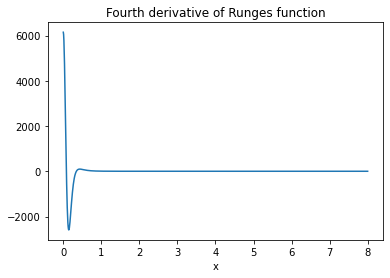

In [18]:
def d4f(x):
    return 6144*(1280*x**4-160*x**2+1)/((1+16*x**2)**5)

x = np.linspace(0, 8, 1001)
plt.plot(x, d4f(x))
plt.xlabel('x')
plt.title('Fourth derivative of Runges function');

## Adaptive Quadrature

In [19]:
def SimpsonAdaptive(f, a, b, tol = 1.e-6, max_level=15, level = 0):
    """
        SimpsonsAdaptive(f, a, b, tol = 1.e-6, level = 0, maks_level=15))

    Compute a composite quadrature with adaptive nodes based on `SimpsonBasic`,
    which provides a quadrature and an approximate error
    
    Input:  
             f: integrand
          a, b: integration interval
           tol: tolerance
     max_level: the maximal number we refine (How often to refine, 15 shoould be fine)
         level: how often did we refine already (ignore in call, starts in zero)
    
    Output:
       The approximation to the integral
    """
    # Step 1
    Q, error_estimate = SimpsonBasic(f, a, b) # The quadrature and the error estimate 
    
    # -------------------------------------------------
    # Write the output, and plot the nodes. 
    # This part is only for illustration. 
    if level == 0:
        print(' l   a           b         error_est   tol')
        print('==============================================') 
    print('{:2d}   {:.6f}   {:.6f}   {:.2e}   {:.2e}'.format(
            level, a, b, abs(error_estimate), tol))
    
    x = np.linspace(a, b, 101)
    plt.plot(x, f(x), [a, b], [f(a), f(b)], '.r')
    plt.title('The integrand and the subintervals')
    # -------------------------------------------------
    
    if level >= max_level:
        print('Warning: Maximum number of levels used.')
        return Q
    
    if abs(error_estimate) < tol: # Accept the result, and return (the improved Integral)
        result = Q + error_estimate      
    else:
        # Divide the interval in two, and apply the algorithm to each interval.
        c = 0.5*(b+a)
        result_left  = SimpsonAdaptive(f, a, c, tol = 0.5*tol, max_level=max_level, level = level+1)
        result_right = SimpsonAdaptive(f, c, b, tol = 0.5*tol, max_level=max_level, level = level+1)
        result = result_right + result_left
    return result

Let's try this on Runge's function as well

In [20]:
# Tweak following graphics
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
                     'lines.markersize': 8, 'lines.linewidth': 2}
plt.rcParams.update(newparams)

 l   a           b         error_est   tol
 0   0.000000   8.000000   4.25e-02   1.00e-02
 1   0.000000   4.000000   1.85e-02   5.00e-03
 2   0.000000   2.000000   5.11e-03   2.50e-03
 3   0.000000   1.000000   7.84e-04   1.25e-03
 3   1.000000   2.000000   1.40e-05   1.25e-03
 2   2.000000   4.000000   8.29e-06   2.50e-03
 1   4.000000   8.000000   4.33e-06   5.00e-03


0.3757993668864555

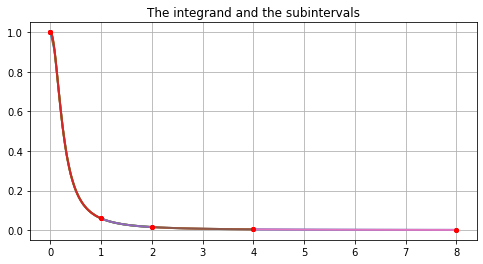

In [21]:
def f(x):
    return 1/(1+16*x**2)

def F(x):
    return np.arctan(4*x)/4

SimpsonAdaptive(f, 0, 8, tol = 10e-3)